# Comparison of models for Like & Dislike (Inversion and No inversion) frames

## Import components

In [1]:
import glam
import pandas as pd
import numpy as np
import os.path
import numpy
import statistics 

import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob
import os



Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def ttestsPlot(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "Like", lab2 = "Dislike",title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("MeanL = "+ str(round(mean(data1),2))+ "; MeanD = "+ str(round(mean(data2),2))+"; [Like - Dislike] =  " + str(round(diff,2) ) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)) )
    
        
    # PLOT LIKE AND DISLIKE VARIABILITY
        
    # Set seaborn style for the plot
    #fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    
    plt.scatter([1]*len(data1)+jittr, data1, c= c1, alpha=0.7,label=lab1)
    plt.scatter([2]*len(data2)+jittr, data2, c= c2, alpha=0.7,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)

    se1 = std(data1)/sqrt(len(data1))
    se2 = std(data2)/sqrt(len(data2))

    plt.errorbar([1], [mean(data1)], yerr=se1*1.96, lw=2, color='#000000')
    plt.errorbar([2], [mean(data2)], yerr=se2*1.96, lw=2, color='#000000')
        
    plt.scatter( [1] ,  [mean(data1)] , color = c1,s=140,edgecolors = 'black', )
    plt.scatter( [2] ,  [mean(data2)] , color = c2,s=140,edgecolors = 'black', )

    #legend(loc = 'best')
    plt.xticks([1, 2,], [lab1, lab2],fontsize=25)
    plt.ylabel(title, fontsize=25)
    sns.despine()

# No inversion condition in Dislike
--------------------------------------------------------------------


# Load parameters for both conditions

In [13]:
# Load params from DISLIKE hierarchical model (using inverted input [3-value])
Dislike_sufix = '_individual_Less_NoBin_Gamma-11_NUTS_33'
glam_full_dislike_estimates = np.load(str('results/estimates/glam_PF2019_full'+Dislike_sufix+'.npy'))   

# Load params from LIKE hierarchical model
Like_sufix = '_individual_More_NoBin_Gamma-11_NUTS_33'
glam_full_like_estimates = np.load(str('results/estimates/glam_PF2019_full'+Like_sufix+'.npy'))   


## Parameters Like

In [14]:
len(glam_full_like_estimates)

32

In [15]:
params_part_like = pd.DataFrame()
params_part_dislike = pd.DataFrame()

for i in range(len(glam_full_like_estimates)):
    
    params_part_like1 = pd.DataFrame.from_dict(glam_full_like_estimates.item(i))
    params_part_like = pd.concat([params_part_like ,params_part_like1])
    
    params_part_dislike1 = pd.DataFrame.from_dict(glam_full_dislike_estimates.item(i))
    params_part_dislike = pd.concat([params_part_dislike ,params_part_dislike1])

params_part_like = params_part_like.reset_index(drop=True)
params_part_dislike = params_part_dislike.reset_index(drop=True)

In [16]:
params_part_dislike

,b,p_error,v,gamma,SNR,s,tau,t0
0,1.0,0.05,0.000052,-0.92,133.85,0.007718,0.01,0.0
1,1.0,0.05,0.000016,-0.99,322.12,0.006114,0.05,0.0
2,1.0,0.05,0.000034,-0.10,195.74,0.006339,0.14,0.0
3,1.0,0.05,0.000021,-0.99,435.35,0.008508,0.11,0.0
4,1.0,0.05,0.000031,-0.99,169.32,0.005410,0.06,0.0
5,1.0,0.05,0.000058,-0.70,107.39,0.005416,0.08,0.0
6,1.0,0.05,0.000030,-0.99,219.15,0.007774,0.09,0.0
7,1.0,0.05,0.000051,-0.99,129.52,0.006626,0.09,0.0
8,1.0,0.05,0.000114,-0.84,48.38,0.005459,0.00,0.0
9,1.0,0.05,0.000055,-0.99,160.39,0.009785,0.06,0.0


In [17]:
params_part_like

,b,p_error,v,gamma,SNR,s,tau,t0
0,1.0,0.05,0.000041,0.85,203.91,0.009766,0.28,0.0
1,1.0,0.05,0.000012,0.89,484.37,0.005238,0.29,0.0
2,1.0,0.05,0.000031,-0.09,300.85,0.007449,0.13,0.0
3,1.0,0.05,0.000022,0.98,462.96,0.010301,0.17,0.0
4,1.0,0.05,0.000031,0.68,173.23,0.005436,0.13,0.0
5,1.0,0.05,0.000043,0.63,152.61,0.007799,0.08,0.0
6,1.0,0.05,0.000025,0.82,404.11,0.011048,0.10,0.0
7,1.0,0.05,0.000052,-0.27,123.62,0.007531,0.06,0.0
8,1.0,0.05,0.000095,0.99,54.69,0.005685,0.02,0.0
9,1.0,0.05,0.000040,0.08,185.80,0.009549,0.32,0.0


In [18]:
# getting max, min and median values for our parameters from participants results
median_SNR_l = params_part_like[['SNR']].median().iloc[0]
median_gamma_l = params_part_like[['gamma']].median().iloc[0]
median_tau_l = params_part_like[['tau']].median().iloc[0]
median_v_l = params_part_like[['v']].median().iloc[0]
median_s_l = params_part_like[['s']].median().iloc[0]

medians_l = [ median_SNR_l , median_gamma_l, median_tau_l ,median_v_l ,median_s_l ]

max_SNR_l = params_part_like[['SNR']].max().iloc[0]
max_gamma_l = params_part_like[['gamma']].max().iloc[0]
max_tau_l = params_part_like[['tau']].max().iloc[0]
max_v_l = params_part_like[['v']].max().iloc[0]
max_s_l = params_part_like[['s']].max().iloc[0]

maxims_l = [ max_SNR_l , max_gamma_l, max_tau_l ,max_v_l ,max_s_l ]

min_SNR_l = params_part_like[['SNR']].min().iloc[0]
min_gamma_l = params_part_like[['gamma']].min().iloc[0]
min_tau_l = params_part_like[['tau']].min().iloc[0]
min_v_l = params_part_like[['v']].min().iloc[0]
min_s_l = params_part_like[['s']].min().iloc[0]

minis_l = [min_SNR_l , min_gamma_l, min_tau_l ,min_v_l ,min_s_l]

params_label = ['SNR','gamma','tau','v','s']

summary_l=[]
summary_l = np.column_stack((params_label, medians_l, maxims_l, minis_l))
summary_l = pd.DataFrame(summary_l, columns = ['params','med','maxims' ,'mins'])

In [19]:
## Merge dislike and like conditions in one dataframe

params_part_dislike['cond'] = 'Dislike'
params_part_like['cond'] = 'Like'
params_part_dislike['part'] = range(len(params_part_dislike))
params_part_like['part'] = range(len(params_part_dislike))
params_participants = [params_part_like , params_part_dislike]
params_participants = pd.concat(params_participants)

## We used repeated measures t-test to look for differences between both conditions.

In [20]:
diff = mean(params_part_like.SNR) - mean(params_part_dislike.SNR)
[s, p] = stats.ttest_rel(params_part_like.SNR,params_part_dislike.SNR)
print ("SNR: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.gamma) - mean(params_part_dislike.gamma)
[s, p] = stats.ttest_rel(params_part_like.gamma,params_part_dislike.gamma)
print ("Gamma: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.tau) - mean(params_part_dislike.tau)
[s, p] = stats.ttest_rel(params_part_like.tau,params_part_dislike.tau)
print ("Tau: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.v) - mean(params_part_dislike.v)
[s, p] = stats.ttest_rel(params_part_like.v,params_part_dislike.v)
print ("V: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.s) - mean(params_part_dislike.s)
[s, p] = stats.ttest_rel(params_part_like.s,params_part_dislike.s)
print ("S: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

SNR: [Like - Dislike] =  64.00125000000008 ; p-value =0.0010952848874250614
Gamma: [Like - Dislike] =  1.4096874999999998 ; p-value =3.222445940177314e-16
Tau: [Like - Dislike] =  0.5159374999999999 ; p-value =0.022645050887304157
V: [Like - Dislike] =  -4.531249999999998e-06 ; p-value =0.03425061506266734
S: [Like - Dislike] =  0.00041284375 ; p-value =0.14536610291302338


## Violin plot for the comparison of the parameters

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


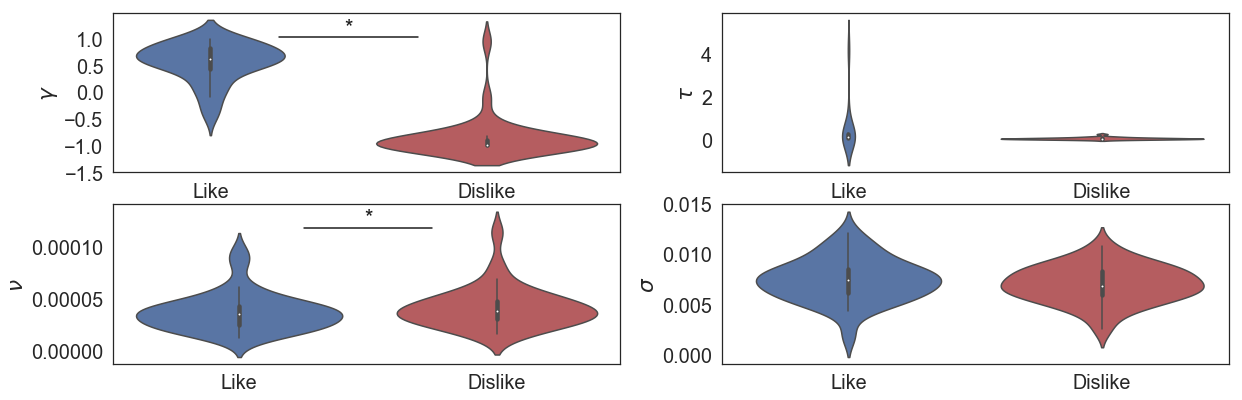

In [21]:
f = plt.figure(figsize=(20,10))
sns.set(style='white', font_scale=1.8)
#plt.suptitle('LIKE vs DISLIKE frames. Hierarchical GLAM Model Fit')

#my_pal = {"r","b","b","y","r"}

my_pal = {0: "b", 1: "r"}

plt.subplot(321)

## ** Since SNR is dependent on gamma we plot gamma as the free parameter 


# FOR gamma
#plt.subplot(321)
all_arr1 = [params_part_like.gamma,
            params_part_dislike.gamma]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\gamma$')
plt.xticks([0 ,1], ['Like', 'Dislike'])
pyplot.locator_params(axis='y', nbins=6)

# Add asterisk
x1, x2 = 0, 1   
y_max = max([params_part_like.gamma.max(), params_part_dislike.gamma.max()])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)



# FOR tau
plt.subplot(322)
all_arr1 = [params_part_like.tau,
            params_part_dislike.tau]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\tau$')
plt.xticks([0, 1,], ['Like', 'Dislike'])
pyplot.locator_params(axis='y', nbins=6)


# FOR v
plt.subplot(323)
all_arr1 = [params_part_like.v,
            params_part_dislike.v]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\nu$')
plt.xticks([0, 1,], ['Like', 'Dislike'])
pyplot.locator_params(axis='y', nbins=6)

# Add asterisk
x1, x2 = 0, 1   
y_max = max([params_part_like.v.max(), params_part_dislike.v.max()])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR s
plt.subplot(324)
all_arr1 = [params_part_like.s,
            params_part_dislike.s]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\sigma$')
plt.xticks([0, 1,], ['Like', 'Dislike'])
#plt.yticks(np.arange(0,  max([params_part_like.s.max(), params_part_dislike.s.max()])))
pyplot.locator_params(axis='y', nbins=6)


MeanL = 0.56; MeanD = -0.85; [Like - Dislike] =  1.41; t =  15.59 ; p-value =0.0
MeanL = 0.58; MeanD = 0.06; [Like - Dislike] =  0.52; t =  2.4 ; p-value =0.02
MeanL = 0.0; MeanD = 0.0; [Like - Dislike] =  -0.0; t =  -2.21 ; p-value =0.03
MeanL = 0.01; MeanD = 0.01; [Like - Dislike] =  0.0; t =  1.49 ; p-value =0.15


(0.004, 0.012)

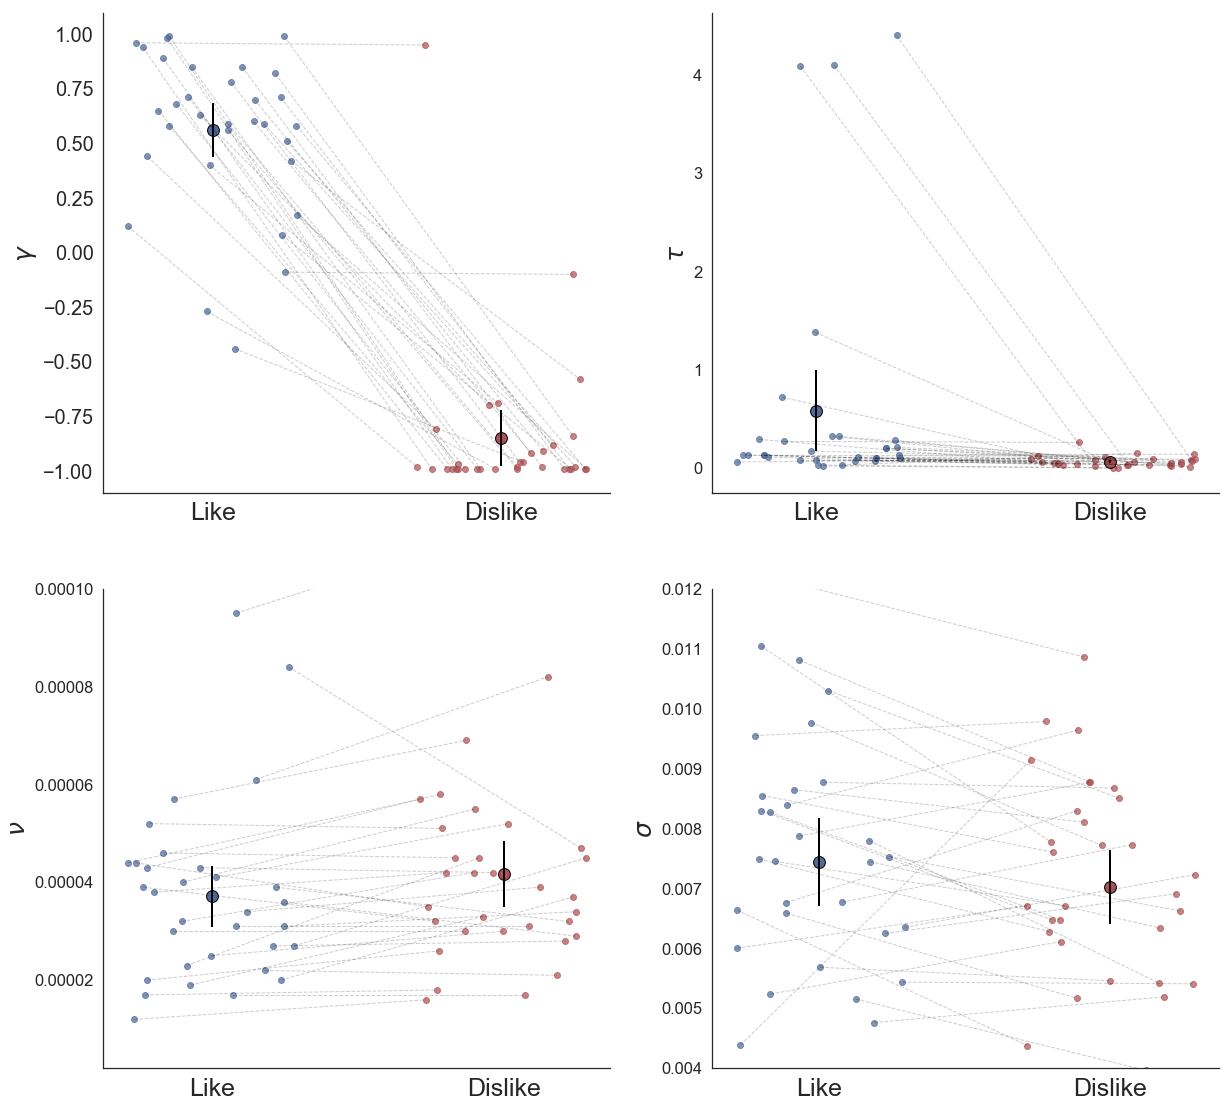

In [22]:
f = plt.figure(figsize=(20,30))
sns.set(style='white', font_scale=1.8)

plt.subplot(321)
ttestsPlot(params_part_like.gamma, params_part_dislike.gamma,'#4F6A9A','#AC5255',"Like",  "Dislike",title = '$\gamma$')
plt.subplot(322)
ttestsPlot(params_part_like.tau, params_part_dislike.tau,'#4F6A9A','#AC5255',"Like",  "Dislike",title = r'$\tau$')
plt.subplot(323)
ttestsPlot(params_part_like.v, params_part_dislike.v,'#4F6A9A','#AC5255',"Like",  "Dislike",title = r'$\nu$')
plt.ylim(0.000002, 0.0001)
plt.subplot(324)
ttestsPlot(params_part_like.s, params_part_dislike.s,'#4F6A9A','#AC5255',"Like",  "Dislike",title = '$\sigma$')
plt.ylim(0.004,0.012 )

# Inversion condition in Dislike
--------------------------------------------------------

In [24]:
# Load params from DISLIKE hierarchical model (using inverted input [3-value])
Dislike_sufix = '_individual_Less_Inv_NoBin_Gamma-11_NUTS_33'
glam_full_dislike_estimates = np.load(str('results/estimates/glam_PF2019_full'+Dislike_sufix+'.npy'))   

# Load params from LIKE hierarchical model
Like_sufix = '_individual_More_NoBin_Gamma-11_NUTS_33'
glam_full_like_estimates = np.load(str('results/estimates/glam_PF2019_full'+Like_sufix+'.npy'))   


## Parameters Like

In [25]:
len(glam_full_like_estimates)

32

In [26]:
params_part_like = pd.DataFrame()
params_part_dislike = pd.DataFrame()

for i in range(len(glam_full_like_estimates)):
    
    params_part_like1 = pd.DataFrame.from_dict(glam_full_like_estimates.item(i))
    params_part_like = pd.concat([params_part_like ,params_part_like1])
    
    params_part_dislike1 = pd.DataFrame.from_dict(glam_full_dislike_estimates.item(i))
    params_part_dislike = pd.concat([params_part_dislike ,params_part_dislike1])

params_part_like = params_part_like.reset_index(drop=True)
params_part_dislike = params_part_dislike.reset_index(drop=True)

In [27]:
params_part_dislike

,b,p_error,v,gamma,SNR,s,tau,t0
0,1.0,0.05,0.000036,0.55,180.21,0.007948,0.10,0.0
1,1.0,0.05,0.000014,0.72,433.15,0.006079,0.27,0.0
2,1.0,0.05,0.000036,0.06,202.70,0.006563,0.07,0.0
3,1.0,0.05,0.000021,-0.38,447.05,0.010174,0.12,0.0
4,1.0,0.05,0.000031,0.16,153.31,0.004910,0.07,0.0
5,1.0,0.05,0.000055,0.27,99.98,0.006707,0.09,0.0
6,1.0,0.05,0.000029,0.61,406.20,0.008934,0.15,0.0
7,1.0,0.05,0.000053,-0.46,114.87,0.006286,0.06,0.0
8,1.0,0.05,0.000107,0.94,47.88,0.005236,0.01,0.0
9,1.0,0.05,0.000045,0.71,155.89,0.008849,0.14,0.0


In [28]:
params_part_like

,b,p_error,v,gamma,SNR,s,tau,t0
0,1.0,0.05,0.000041,0.85,203.91,0.009766,0.28,0.0
1,1.0,0.05,0.000012,0.89,484.37,0.005238,0.29,0.0
2,1.0,0.05,0.000031,-0.09,300.85,0.007449,0.13,0.0
3,1.0,0.05,0.000022,0.98,462.96,0.010301,0.17,0.0
4,1.0,0.05,0.000031,0.68,173.23,0.005436,0.13,0.0
5,1.0,0.05,0.000043,0.63,152.61,0.007799,0.08,0.0
6,1.0,0.05,0.000025,0.82,404.11,0.011048,0.10,0.0
7,1.0,0.05,0.000052,-0.27,123.62,0.007531,0.06,0.0
8,1.0,0.05,0.000095,0.99,54.69,0.005685,0.02,0.0
9,1.0,0.05,0.000040,0.08,185.80,0.009549,0.32,0.0


# Load parameters for both conditions

In [29]:
# getting max, min and median values for our parameters from participants results
median_SNR_l = params_part_like[['SNR']].median().iloc[0]
median_gamma_l = params_part_like[['gamma']].median().iloc[0]
median_tau_l = params_part_like[['tau']].median().iloc[0]
median_v_l = params_part_like[['v']].median().iloc[0]
median_s_l = params_part_like[['s']].median().iloc[0]

medians_l = [ median_SNR_l , median_gamma_l, median_tau_l ,median_v_l ,median_s_l ]

max_SNR_l = params_part_like[['SNR']].max().iloc[0]
max_gamma_l = params_part_like[['gamma']].max().iloc[0]
max_tau_l = params_part_like[['tau']].max().iloc[0]
max_v_l = params_part_like[['v']].max().iloc[0]
max_s_l = params_part_like[['s']].max().iloc[0]

maxims_l = [ max_SNR_l , max_gamma_l, max_tau_l ,max_v_l ,max_s_l ]

min_SNR_l = params_part_like[['SNR']].min().iloc[0]
min_gamma_l = params_part_like[['gamma']].min().iloc[0]
min_tau_l = params_part_like[['tau']].min().iloc[0]
min_v_l = params_part_like[['v']].min().iloc[0]
min_s_l = params_part_like[['s']].min().iloc[0]

minis_l = [min_SNR_l , min_gamma_l, min_tau_l ,min_v_l ,min_s_l]

params_label = ['SNR','gamma','tau','v','s']

summary_l=[]
summary_l = np.column_stack((params_label, medians_l, maxims_l, minis_l))
summary_l = pd.DataFrame(summary_l, columns = ['params','med','maxims' ,'mins'])

In [30]:
## Merge dislike and like conditions in one dataframe

params_part_dislike['cond'] = 'Dislike'
params_part_like['cond'] = 'Like'
params_part_dislike['part'] = range(len(params_part_dislike))
params_part_like['part'] = range(len(params_part_dislike))
params_participants = [params_part_like , params_part_dislike]
params_participants = pd.concat(params_participants)

## We used repeated measures t-test to look for differences between both conditions.

In [31]:
diff = mean(params_part_like.SNR) - mean(params_part_dislike.SNR)
[s, p] = stats.ttest_rel(params_part_like.SNR,params_part_dislike.SNR)
print ("SNR: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.gamma) - mean(params_part_dislike.gamma)
[s, p] = stats.ttest_rel(params_part_like.gamma,params_part_dislike.gamma)
print ("Gamma: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.tau) - mean(params_part_dislike.tau)
[s, p] = stats.ttest_rel(params_part_like.tau,params_part_dislike.tau)
print ("Tau: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.v) - mean(params_part_dislike.v)
[s, p] = stats.ttest_rel(params_part_like.v,params_part_dislike.v)
print ("V: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )
print ("V: Like : " + str(mean(params_part_like.v)) + " ; Dislike =" + str(mean(params_part_dislike.v)) )

diff = mean(params_part_like.s) - mean(params_part_dislike.s)
[s, p] = stats.ttest_rel(params_part_like.s,params_part_dislike.s)
print ("S: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

SNR: [Like - Dislike] =  51.888437500000094 ; p-value =0.0014508286114476574
Gamma: [Like - Dislike] =  0.27031250000000007 ; p-value =0.00018181478020553866
Tau: [Like - Dislike] =  0.36187499999999995 ; p-value =0.13925212069162576
V: [Like - Dislike] =  -8.750000000000009e-07 ; p-value =0.616974839216416
V: Like : 3.715625e-05 ; Dislike =3.803125e-05
S: [Like - Dislike] =  0.000669687500000001 ; p-value =0.00571454139768944


## Violin plot for the comparison of the parameters

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.0125746,'*')

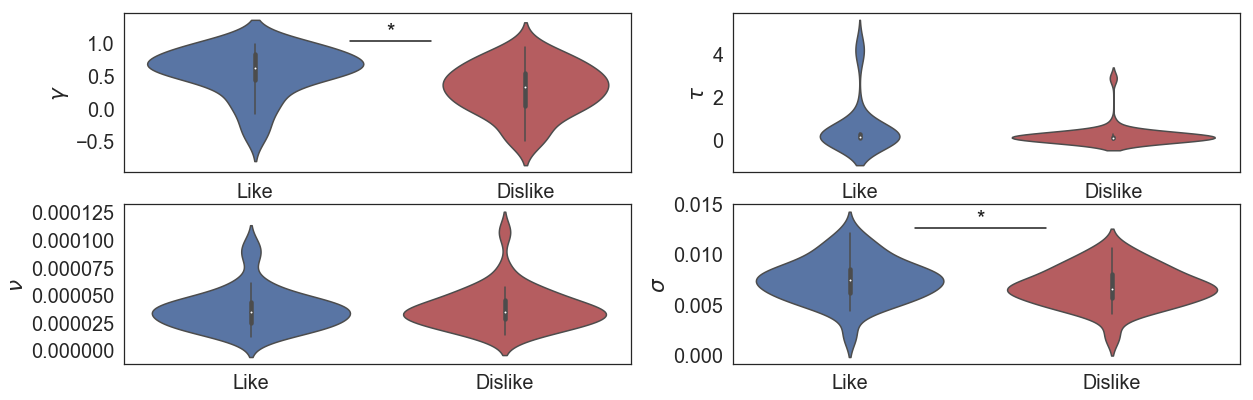

In [38]:
f = plt.figure(figsize=(20,10))
sns.set(style='white', font_scale=1.8)

#my_pal = {"r","b","b","y","r"}

my_pal = {0: "b", 1: "r"}

plt.subplot(321)

## ** Since SNR is dependent on gamma we plot gamma as the free parameter 

### FOR SNR
##all_arr = [params_part_like.SNR,
##          params_part_dislike.SNR]
##bplot = sns.violinplot(data=all_arr , palette=my_pal).set( ylabel='SNR')
##plt.xticks([0, 1,], ['Like', 'Dislike'])

## Add asterisk
#x1, x2 = 0, 1   
#y_max = max([params_part_like.SNR.max(), params_part_dislike.SNR.max()])
#y, h, col = y_max + y_max/50, y_max/50, 'k'
#plt.plot( [x1+0.1, x2-0.1], [ y+h, y+h], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR gamma
#plt.subplot(321)
all_arr1 = [params_part_like.gamma,
            params_part_dislike.gamma]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\gamma$')
plt.xticks([0 ,1], ['Like', 'Dislike'])

pyplot.locator_params(axis='y', nbins=6)

# Add asterisk
x1, x2 = 0, 1   
y_max = max([params_part_like.gamma.max(), params_part_dislike.gamma.max()])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.35, x2-0.35], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)


# FOR tau
plt.subplot(322)
all_arr1 = [params_part_like.tau,
            params_part_dislike.tau]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\tau$')
plt.xticks([0, 1,], ['Like', 'Dislike'])
pyplot.locator_params(axis='y', nbins=6)


# FOR v
plt.subplot(323)
all_arr1 = [params_part_like.v,
            params_part_dislike.v]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\nu$')
plt.xticks([0, 1,], ['Like', 'Dislike'])
pyplot.locator_params(axis='y', nbins=6)


# FOR s
plt.subplot(324)
all_arr1 = [params_part_like.s,
            params_part_dislike.s]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel=r'$\sigma$')
plt.xticks([0, 1,], ['Like', 'Dislike'])
pyplot.locator_params(axis='y', nbins=6)

# Add asterisk
x1, x2 = 0, 1   
y_max = max([params_part_like.s.max(), params_part_dislike.s.max()])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)



In [33]:
def add_star(list1,list2):
    x1, x2 = 1, 2   
    y_max = max([list1.max(),list2.max()])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)


MeanL = 0.56; MeanD = 0.29; [Like - Dislike] =  0.27; t =  4.25 ; p-value =0.0
MeanL = 0.58; MeanD = 0.22; [Like - Dislike] =  0.36; t =  1.52 ; p-value =0.14
MeanL = 0.0; MeanD = 0.0; [Like - Dislike] =  -0.0; t =  -0.51 ; p-value =0.62
MeanL = 0.01; MeanD = 0.01; [Like - Dislike] =  0.0; t =  2.97 ; p-value =0.01


(0.0, 0.012)

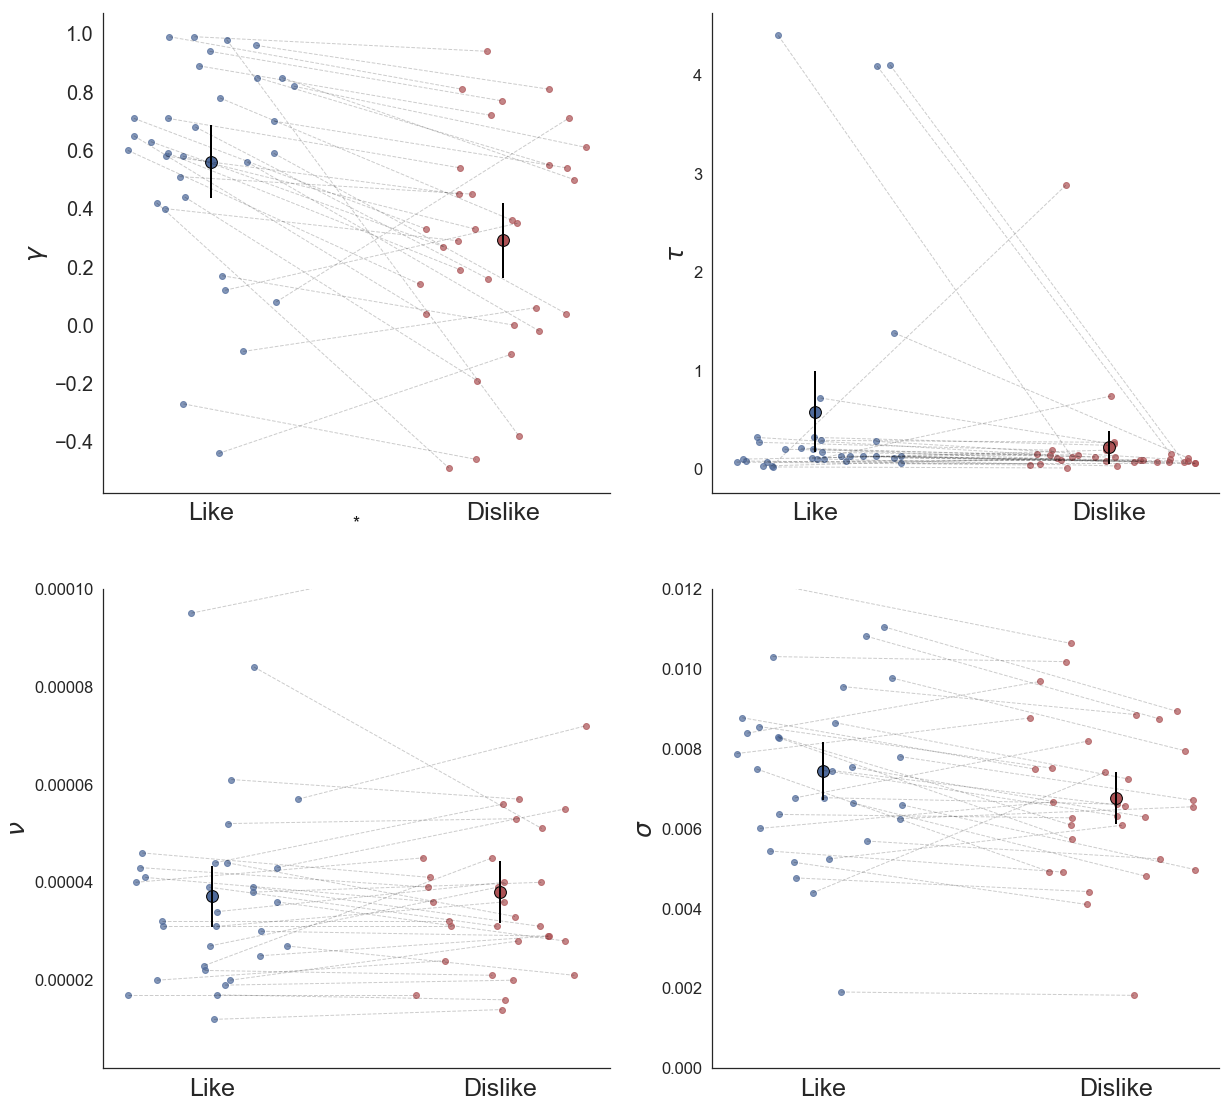

In [34]:
f = plt.figure(figsize=(20,30))
sns.set(style='white', font_scale=1.8)

plt.subplot(321)
ttestsPlot(params_part_like.gamma, params_part_dislike.gamma,'#4F6A9A','#AC5255',"Like",  "Dislike",title = '$\gamma$')
#add_star(params_part_like.gamma,params_part_dislike.gamma)

plt.subplot(322)
ttestsPlot(params_part_like.tau, params_part_dislike.tau,'#4F6A9A','#AC5255',"Like",  "Dislike",title = r'$\tau$')
#add_star(params_part_like.tau,params_part_dislike.tau)

plt.subplot(323)
ttestsPlot(params_part_like.v, params_part_dislike.v,'#4F6A9A','#AC5255',"Like",  "Dislike",title = r'$\nu$')
plt.ylim(0.000002, 0.0001)
add_star(params_part_like.v,params_part_dislike.v)

plt.subplot(324)
ttestsPlot(params_part_like.s, params_part_dislike.s,'#4F6A9A','#AC5255',"Like",  "Dislike",title = '$\sigma$')
plt.ylim(0.000,0.012 )